In [1]:
# git necessário. por exemplo, para o ambiente conda, executar pela linha de comando:
#
# > conda install git
#
# para o google colab:
#
# !conda install git
!pip install git+https://github.com/alchemyst/Skogestad-Python

# versão do matplotlib que funcionada adequadamente com o pacote no Colab
!pip install matplotlib==3.1.3 

Defaulting to user installation because normal site-packages is not writeable
  Cloning https://github.com/alchemyst/Skogestad-Python to /tmp/pip-req-build-_284tk9g
  Running command git clone --filter=blob:none --quiet https://github.com/alchemyst/Skogestad-Python /tmp/pip-req-build-_284tk9g
  Resolved https://github.com/alchemyst/Skogestad-Python to commit bcdb6778a3b1adc0aed2d2f2864122c7da8f7fcd
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 5.8 MB/s eta 0:00:00
  Obtaining dependency information for jupyterlab>=1.2 from https://files.pythonhosted.org/packages/71/a3/38b9d6492a393dcfdae9e82021655432a9fd6e8f4c03c30a7b55036c0d70/jupyterlab-4.0.5-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 16.9 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for async-lru>=1.0.0 from https://files.pythonhosted.org/packages/fa/9f/3c3503693386c4b0f245eaf5ca6198e3b28879ca0a40bde6b0e319793453/async_lru-

In [2]:
import numpy as np
import robustcontrol
from robustcontrol import InternalDelay
from robustcontrol import utils
from robustcontrol.utils import tf
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10,10) # tamanho do gráfico
plt.rcParams['font.size'] = 16 # tamanho da letra

In [3]:
# Aproximação de um sistema sem oscilação por um sistema de primeira ordem com atraso (delay)

# sistema original
sys = tf([1],[1,3,2]); # polos em -1 e -2 (sem oscilação)

# parâmetros usados na aproximação (slide 3 Aula 15 - Semana 6)
K = 0.5; # valor de regime permanente alcançado com a entrada degrau
L = 0.3; # tempo necessário entre o valor inicial e a intersecção da linha tangente
tau = 1.3; # tempo necessário entre a intersecção e o regime permanente
G = tf(K,[tau,1],deadtime = L) # aprox

sys_id = utils.InternalDelay.from_tf_coefficients([1], [1,3,2], [0])
G_id = utils.InternalDelay.from_tf_coefficients([K], [tau,1], [L])

t = np.linspace(0, 5, 5000)

y = sys_id.simulate(lambda t: [1], t)
ydelay = G_id.simulate(lambda t: [1], t)

#sys = InternalDelay(sys)
#G = InternalDelay(G)


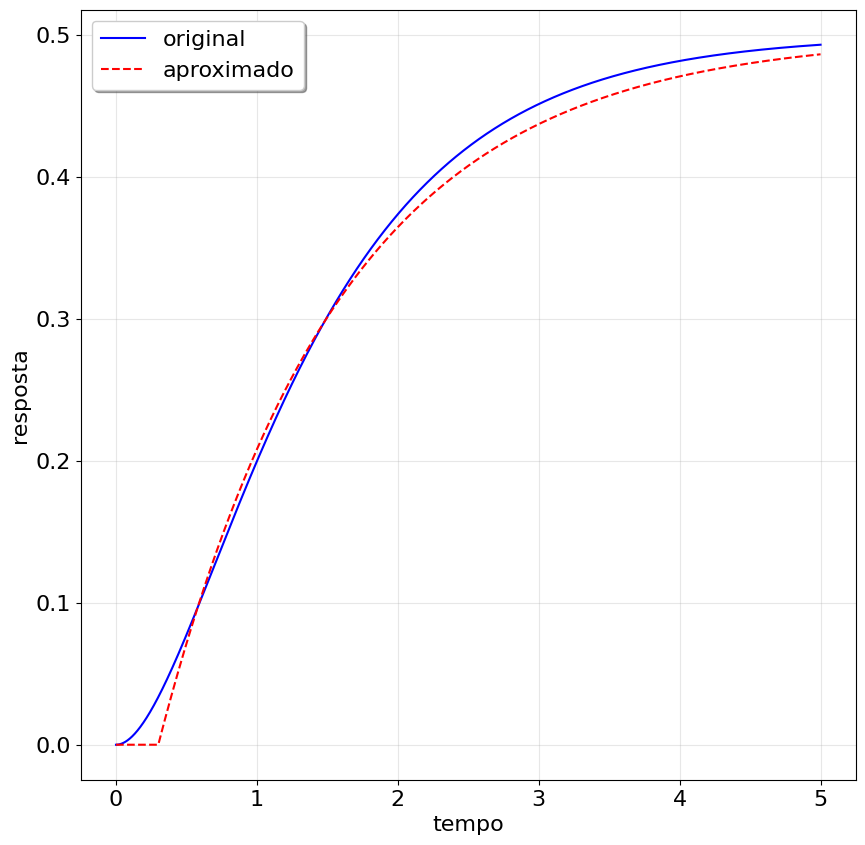

In [4]:
# comparação entre as respostas temporais para a entrada degrau
plt.figure(1)
plt.plot(t, y, 'b', linewidth=1.5, label='original')
plt.plot(t, ydelay, 'r--', linewidth=1.5, label='aproximado')
plt.xlabel('tempo')
plt.ylabel('resposta')
plt.legend(loc='best', shadow=True, framealpha=1)
plt.grid(alpha=0.3)
plt.show()
